In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset

In [26]:
file_path = "/content/TBO_4k_train.xlsx"
df = pd.read_excel(file_path)


# Display dataset info

In [27]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4000 non-null   int64 
 1   text         4000 non-null   object
 2   T1 Target    2934 non-null   object
 3   T1 Argument  3958 non-null   object
 4   T1 Harmful   4000 non-null   object
 5   T2 Target    1631 non-null   object
 6   T2 Argument  2072 non-null   object
 7   T2 Harmful   2073 non-null   object
 8   T3 Target    532 non-null    object
 9   T3 Argument  669 non-null    object
 10  T3 Harmful   669 non-null    object
 11  T4 Target    121 non-null    object
 12  T4 Argument  151 non-null    object
 13  T4 Harmful   151 non-null    object
 14  T5 Target    23 non-null     object
 15  T5 Argument  29 non-null     object
 16  T5 Harmful   29 non-null     object
 17  T6 Target    2 non-null      object
 18  T6 Argument  2 non-null      object
 19  T6 Harmful   2 non-null    

# Preprocessing function for text cleaning

In [28]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['clean_text'] = df['text'].apply(preprocess_text)


# EDA: Word Cloud

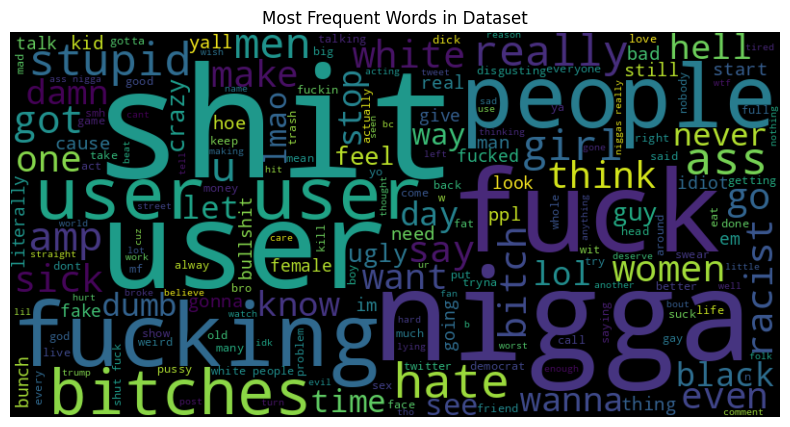

In [30]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Dataset")
plt.show()

# Convert 'T1 Harmful' column to numeric labels ('NO' -> 0, 'YES' -> 1)

In [31]:
df['label'] = df['T1 Harmful'].fillna("NO").map({"NO": 0, "YES": 1})

# Train-test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)



# Convert text to numerical features using TF-IDF Vectorization

In [33]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Train Random Forest Model

In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)

# Train SVM Model

In [35]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

# Evaluate both models

In [36]:
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

rf_report = classification_report(y_test, rf_pred, output_dict=True)
svm_report = classification_report(y_test, svm_pred, output_dict=True)

# Display classification reports

In [37]:
import pandas as pd

# Extract evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
rf_scores = [
    rf_accuracy,
    rf_report['1']['precision'],
    rf_report['1']['recall'],
    rf_report['1']['f1-score']
]
svm_scores = [
    svm_accuracy,
    svm_report['1']['precision'],
    svm_report['1']['recall'],
    svm_report['1']['f1-score']
]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({'Metric': metrics, 'Random Forest': rf_scores, 'SVM': svm_scores})
print("\n📊 Model Performance Comparison:\n")
print(comparison_df.to_string(index=False))




📊 Model Performance Comparison:

   Metric  Random Forest      SVM
 Accuracy       0.707500 0.708750
Precision       0.751950 0.775510
   Recall       0.865350 0.818671
 F1-Score       0.804674 0.796507


# Performance comparison visualization


📊 Model Performance Comparison:

   Metric  Random Forest      SVM
 Accuracy       0.707500 0.708750
Precision       0.751950 0.775510
   Recall       0.865350 0.818671
 F1-Score       0.804674 0.796507


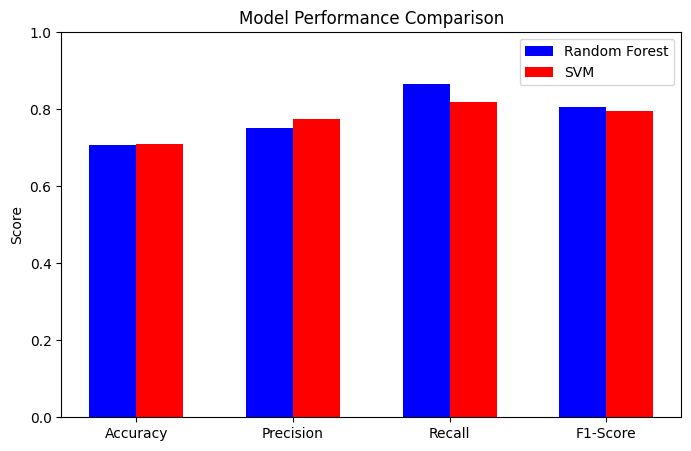

In [38]:
comparison_df = pd.DataFrame({'Metric': metrics, 'Random Forest': rf_scores, 'SVM': svm_scores})
print("\n📊 Model Performance Comparison:\n")
print(comparison_df.to_string(index=False))

# 📊 1. Model Performance Comparison Chart
x = np.arange(len(metrics))
width = 0.3

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, rf_scores, width, label='Random Forest', color='blue')
plt.bar(x + width/2, svm_scores, width, label='SVM', color='red')

plt.xticks(ticks=x, labels=metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(0, 1)
plt.show()

#Confusion Matrix for Random Forest and svm

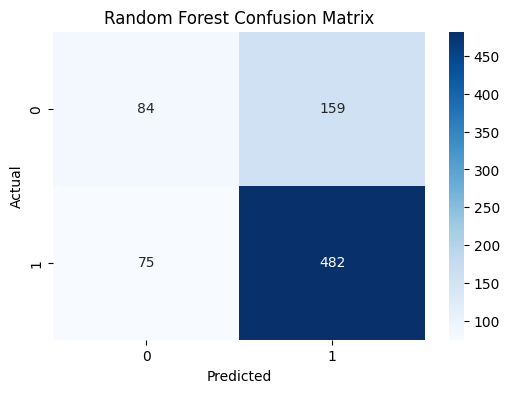

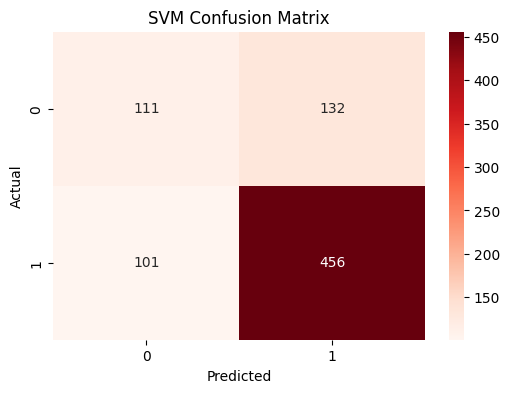

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

#Word Cloud for Most Common Words

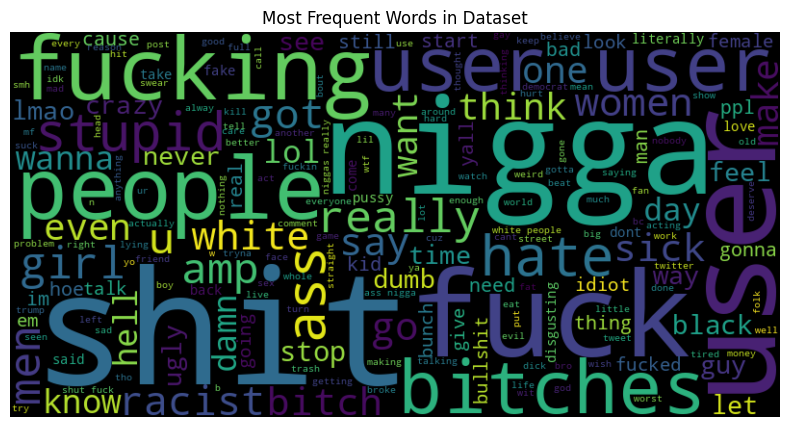

In [40]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Dataset")
plt.show()

#Experiment and testing


Running Test A with RF Trees=100, SVM C=1.0
Epoch 1 - RF Accuracy: 0.6963, SVM Accuracy: 0.7050
Epoch 2 - RF Accuracy: 0.7050, SVM Accuracy: 0.7025
Epoch 3 - RF Accuracy: 0.7200, SVM Accuracy: 0.6950
Epoch 4 - RF Accuracy: 0.6763, SVM Accuracy: 0.6675
Epoch 5 - RF Accuracy: 0.6737, SVM Accuracy: 0.6687
Epoch 6 - RF Accuracy: 0.7113, SVM Accuracy: 0.7125

Running Test B with RF Trees=150, SVM C=1.0
Epoch 1 - RF Accuracy: 0.6900, SVM Accuracy: 0.7050
Epoch 2 - RF Accuracy: 0.6975, SVM Accuracy: 0.7025
Epoch 3 - RF Accuracy: 0.7212, SVM Accuracy: 0.6950
Epoch 4 - RF Accuracy: 0.6825, SVM Accuracy: 0.6675
Epoch 5 - RF Accuracy: 0.6700, SVM Accuracy: 0.6687
Epoch 6 - RF Accuracy: 0.7075, SVM Accuracy: 0.7125

Running Test C with RF Trees=200, SVM C=0.8
Epoch 1 - RF Accuracy: 0.6950, SVM Accuracy: 0.7100
Epoch 2 - RF Accuracy: 0.6987, SVM Accuracy: 0.6950
Epoch 3 - RF Accuracy: 0.7300, SVM Accuracy: 0.7063
Epoch 4 - RF Accuracy: 0.6837, SVM Accuracy: 0.6763
Epoch 5 - RF Accuracy: 0.6750, SV

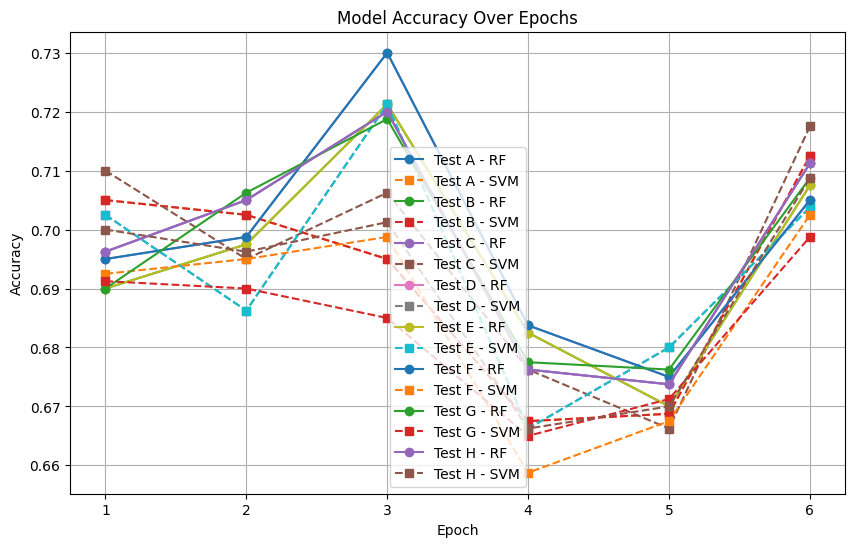

In [44]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])
y = df['label']
# Test configurations
test_configs = [
    ("Test A", 100, 1.0),
    ("Test B", 150, 1.0),
    ("Test C", 200, 0.8),
    ("Test D", 100, 0.5),
    ("Test E", 150, 0.5),
    ("Test F", 200, 1.5),
    ("Test G", 50, 2.0),
    ("Test H", 100, 1.2)
]

# Store results
results = {}

# Run tests
for test_name, rf_trees, svm_c in test_configs:
    print(f"\nRunning {test_name} with RF Trees={rf_trees}, SVM C={svm_c}")

    rf_accuracies = []
    svm_accuracies = []

    for epoch in range(1, 7):  # Run for 6 epochs
        # Split data (random shuffle for each epoch)
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=epoch)

        # Train Random Forest
        rf_model = RandomForestClassifier(n_estimators=rf_trees, random_state=epoch)
        rf_model.fit(X_train, y_train)
        rf_pred = rf_model.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_pred)
        rf_accuracies.append(rf_accuracy)

        # Train SVM
        svm_model = SVC(kernel='linear', C=svm_c, random_state=epoch)
        svm_model.fit(X_train, y_train)
        svm_pred = svm_model.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_pred)
        svm_accuracies.append(svm_accuracy)

        print(f"Epoch {epoch} - RF Accuracy: {rf_accuracy:.4f}, SVM Accuracy: {svm_accuracy:.4f}")

    # Store results
    results[test_name] = {"rf": rf_accuracies, "svm": svm_accuracies}

# Plot accuracy trends across epochs
plt.figure(figsize=(10, 6))

for test_name, acc in results.items():
    plt.plot(range(1, 7), acc["rf"], marker='o', linestyle='-', label=f"{test_name} - RF")
    plt.plot(range(1, 7), acc["svm"], marker='s', linestyle='--', label=f"{test_name} - SVM")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()